<a href="https://colab.research.google.com/github/jogepa/License_plate_detection/blob/main/Crop_plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading required dependencies

In [1]:
#!pip install -U yolov5

In [2]:
import yolov5

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#Setup 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

%matplotlib inline
import matplotlib.pyplot as plt 

In [ ]:
## load pretrained YoloV5 model https://huggingface.co/keremberke/yolov5m-license-plate
yolo_model = yolov5.load('keremberke/yolov5m-license-plate')
  
# set model parameters
yolo_model.conf = 0.25  # NMS confidence threshold
yolo_model.iou = 0.45  # NMS IoU threshold
yolo_model.agnostic = False  # NMS class-agnostic
yolo_model.multi_label = False  # NMS multiple labels per box
yolo_model.max_det = 1000  # maximum number of detections per image

##Loading the image

In [5]:
# Load the image
#try out different images
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars0.png' #1 ok, 2 nok
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars1.png' #G as 0
image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars14.png' #8 and B 
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars73.png'#ok
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars77.png' # characters close to each other.. 
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars113.png'
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars98.png' #O and 0
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars11.png' #OK
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars39.png' #pretty bad
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars108.png' #bettter with M, issues between Y and V. 
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars118.png' #easy
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars120.png'#ok
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars189.png' # 1 ok, 2 issues with N and W. 
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars199.png' #issues with M 
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars126.png' # cagadero.. 
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars153.png' Q and G bad visibility
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars179.png' #Weird 4 and weird s 
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars34.png' #ok
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars25.png' #Not good
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars241.png' #tilted, char ident nok
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars239.png'# All good BMW
#image_dir = '/content/gdrive/Shareddrives/Character_images/data/Car_images/Cars9.png' # M and V incorrect



# Load image and convert the image to a NumPy array
img = load_img(image_dir)
img_array = img_to_array(img)
print("Original image size = " , img_array.shape)

# Reshape the image using tf.image.resize
resized_img = tf.image.resize(img_array, (img_array.shape[0], img_array.shape[1]))

# Convert the resized image array back to an image object
img = array_to_img(resized_img)
img = np.expand_dims(img, 0).astype("float32") / 255
print("Resized image size = " , img.shape)

Original image size =  (225, 400, 3)
Resized image size =  (1, 225, 400, 3)


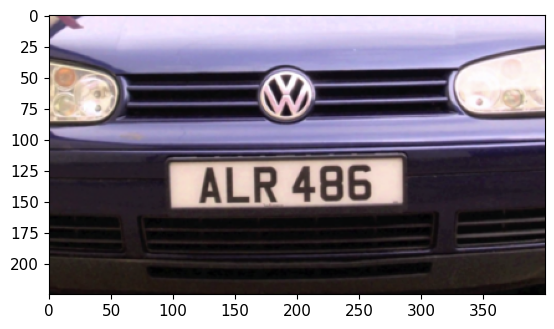

In [6]:
#Visualize the image 
plt.imshow(img[0])
plt.show()

#Getting License plate coordinate


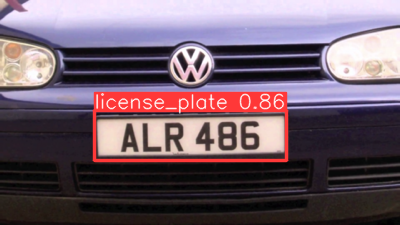

In [8]:
# inference with test time augmentation
results = yolo_model(image_dir, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
#categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

In [10]:
#Getting the coordinates of the licence plate box
x1, y1, x2, y2 = boxes[0]
x1 = int(x1)
y1 = int(y1)
x2 = int(x2)
y2 = int(y2)

#Print coordinates
print("x1= ", x1)
print("y1= ", y1)
print("x2= ", x2)
print("y2= ", y2)

x1=  94
y1=  110
x2=  286
y2=  160


#Cropping the image


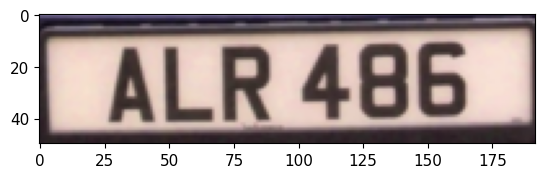

In [12]:
#Cropping the image using the license plate box coordinates
cropped_img = img[0,y1:y2,x1:x2,:]
plt.imshow(cropped_img)

In [13]:
# Save the image to Google Drive
save_path = '/content/gdrive/Shareddrives/Character_images/cropped_img.jpg'
plt.imsave(save_path, cropped_img)
print("Image saved to google drive")

Image saved to google drive
